# Random Forest Regressor

A random forest regressor is a machine learning algorithm that uses a collection of decision trees to predict the value of a target variable. The individual trees in the forest are randomly generated, which helps to avoid overfitting on the training data. The random forest regressor is able to generalize well to new data, making it an attractive choice for predictive modeling tasks.

In [1]:
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import boxcox
warnings.filterwarnings('ignore')

RSEED=42

sns.set_context('talk')
plt.style.use(['dark_background'])

plt.rcParams.update({'font.sans-serif':'Helvetica'})

In [2]:
# import the data
data = pd.read_csv('data/data_prep_reg.csv', index_col=[0]) # includes the statistics of the features only location D
#data = pd.read_csv('data/data_prep_feat.csv', index_col=[0]) # includes all values as a new features only location D
#data = pd.read_csv('data/data_prep_reg_all.csv', index_col=[0]) # include the statistics of the features an all locations
print(f'Data: {data.shape}')


Data: (4990, 44)


In [3]:
#fillna
data = data.fillna(data.mean())
data.head()

,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,...,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press
1,3,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,...,0.290736,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333
10,3,55.638261,34.041667,17.191667,23.189507,4.432786,19.649595,22.033333,16.850000,10.302,...,0.533776,0.840833,3.285000,90.986667,90.211667,90.624814,0.179998,0.032399,90.641667,0.775000
13,3,32.240851,29.608333,19.166667,23.151446,2.808773,7.889204,22.291667,10.441667,2.229,...,0.195908,0.627500,1.705000,90.744167,90.102500,90.454477,0.149374,0.022312,90.471667,0.641667
15,3,72.717021,29.133333,17.516667,22.341529,3.161073,9.992384,21.683333,11.616667,13.588,...,0.124645,0.625000,1.608333,90.873333,90.284167,90.607307,0.139059,0.019337,90.620833,0.589167
22,3,35.833571,30.558333,16.983333,22.401240,3.592899,12.908921,21.333333,13.575000,43.080,...,0.186272,0.678333,2.197500,91.004167,90.217500,90.600544,0.172882,0.029888,90.600833,0.786667


In [4]:
# define features and target for regression
y = data["target"]
X=np.array(data.drop(["target"], axis= 1),ndmin=2)

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = RSEED) 

print (f'X: {X.shape} \t split into: Train: {X_train.shape} \t and Test: {X_test.shape}')
print (f'y: {y.shape} \t split into: Train: {y_train.shape} \t and Test: {y_test.shape}')


X: (4990, 43) 	 split into: Train: (3493, 43) 	 and Test: (1497, 43)
y: (4990,) 	 split into: Train: (3493,) 	 and Test: (1497,)


In [5]:
# transform values for the model
y_train =y_train.values.reshape(-1,1)

In [6]:
# initialize the model
RFR = RandomForestRegressor() # n_estimators=100, 
                               #random_state=RSEED,
                               #criterion= "poisson",
                               #n_jobs=-1, verbose = 5)

# train the model 
RFR.fit(X_train, y_train)

# make prediction
y_pred_train = RFR.predict(X_train)
y_pred_test = RFR.predict(X_test)

In [7]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")


RMSE _ train: 7.54
RMSE _ test: 19.78


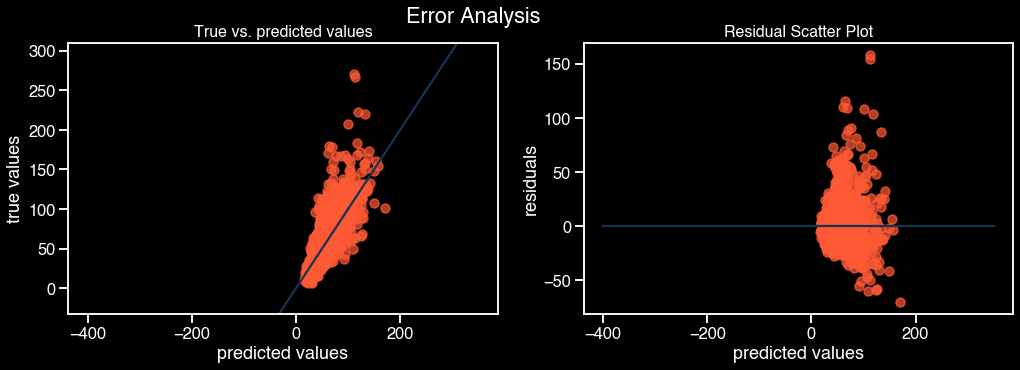

In [8]:
# error analysis

rmse_train = rmse(y_train, y_pred_train)
rmse_test= rmse(y_test, y_pred_test)

print(f'RMSE _ train: {rmse_train:.2f}')
print(f'RMSE _ test: {rmse_test:.2f}')
error_analysis(y_test, y_pred_test)
#error_analysis(y_train,y_pred_train)

# Optimization of the hyperparameters

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
# Defining parameter grid (as dictionary)
# Create the parameters list you wish to tune
parameters = {'n_estimators':np.arange(50, 200, 10),                               
              'min_samples_leaf' : np.arange(30, 100, 10),               
              'max_depth' : np.arange(3, 10, 1),
              "max_features":["auto", "sqrt", "log2"],
             'criterion': ["squared_error", "absolute_error", "poisson"]    
             } 

             #estimators = 163, min_samples_leaf= 10, max_depth = 17, max_features = "auto"


In [11]:
# Instantiate gridsearch and define the metric to optimize 
"""gs = RandomizedSearchCV(RandomForestRegressor(random_state=RSEED ,
                        n_estimators=172 ,max_features = "auto" , max_depth=24,min_samples_leaf=30 , criterion="squared_error"), parameters, scoring='neg_root_mean_squared_error',
                  cv=5, verbose=5, n_jobs=-1)"""

'gs = RandomizedSearchCV(RandomForestRegressor(random_state=RSEED ,\n                        n_estimators=172 ,max_features = "auto" , max_depth=24,min_samples_leaf=30 , criterion="squared_error"), parameters, scoring=\'neg_root_mean_squared_error\',\n                  cv=5, verbose=5, n_jobs=-1)'

In [12]:
gs = RandomizedSearchCV(RandomForestRegressor(), param_distributions=parameters,
                        n_jobs=-1, verbose=5, cv=5 , scoring='neg_root_mean_squared_error')

gs.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=poisson, max_depth=5, max_features=sqrt, min_samples_leaf=50, n_estimators=140;, score=-30.327 total time=   0.6s
[CV 5/5] END criterion=poisson, max_depth=5, max_features=sqrt, min_samples_leaf=50, n_estimators=140;, score=-28.703 total time=   0.6s
[CV 4/5] END criterion=poisson, max_depth=5, max_features=sqrt, min_samples_leaf=50, n_estimators=140;, score=-26.412 total time=   0.7s
[CV 3/5] END criterion=poisson, max_depth=5, max_features=sqrt, min_samples_leaf=50, n_estimators=140;, score=-26.890 total time=   0.7s
[CV 2/5] END criterion=poisson, max_depth=5, max_features=sqrt, min_samples_leaf=50, n_estimators=140;, score=-29.287 total time=   0.8s
[CV 3/5] END criterion=poisson, max_depth=6, max_features=sqrt, min_samples_leaf=70, n_estimators=170;, score=-26.628 total time=   0.9s
[CV 1/5] END criterion=poisson, max_depth=6, max_features=sqrt, min_samples_leaf=70, n_estimators=170;, score=-30.256

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([30, 40, 50, 60, 70, 80, 90]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])},
                   scoring='neg_root_mean_squared_error', verbose=5)

In [13]:
# Best score
print('Best score:', round(gs.best_score_, 3))

# Best parameters
print('Best parameters:', gs.best_params_)

Best score: -25.595
Best parameters: {'n_estimators': 160, 'min_samples_leaf': 30, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'absolute_error'}


In [14]:
# Assigning the fitted SGDClassifier model with best parameter combination to a new variable 
rf_best = gs.best_estimator_

In [15]:
# make predicitons: 
y_pred_train = rf_best.predict(X_train)
y_pred_test = rf_best.predict(X_test)

# Error analyses RMSE
rsme_knr_train = rmse(y_train, y_pred_train )
rsme_knr_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_knr_train:.2f}')
print(f'RSME _ test: {rsme_knr_test:.2f}')

RSME _ train: 24.78
RSME _ test: 25.19


In [16]:
# error analysis train:
#error_analysis(y_train, y_pred_train)

## Optimiertes Model 

#Best parameters: {'n_estimators': 50, 'min_samples_leaf': 50, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'squared_error'}

In [17]:
# initialize the model
RFR_opt = RandomForestRegressor(random_state=RSEED ,
            n_estimators=50 ,
            max_features = "auto" , 
            max_depth=5,
            min_samples_leaf=50 , 
            criterion="squared_error",
            n_jobs=-1, verbose=5)

# train the model
RFR_opt.fit(X_train, y_train)

# make predictions
y_pred_train = RFR_opt.predict(X_train)
y_pred_test = RFR_opt.predict(X_test)

building tree 1 of 50building tree 2 of 50

building tree 3 of 50
building tree 4 of 50building tree 5 of 50
building tree 6 of 50
building tree 7 of 50

building tree 8 of 50
building tree 9 of 50building tree 10 of 50

building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50building tree 15 of 50

building tree 16 of 50
building tree 17 of 50building tree 18 of 50
building tree 19 of 50

building tree 20 of 50
building tree 21 of 50
building tree 22 of 50building tree 23 of 50
building tree 24 of 50

building tree 25 of 50
building tree 26 of 50building tree 27 of 50

building tree 28 of 50building tree 29 of 50

building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50building tree 34 of 50

building tree 35 of 50building tree 36 of 50building tree 37 of 50


building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50building tree 42 of 50

building tree 43 of 50building tree 44 of 5

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  46 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  46 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


In [18]:
# evaluation
rsme_train = rmse(y_train, y_pred_train)
rsme_test= rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_train:.2f}')
print(f'RSME _ test: {rsme_test:.2f}')

RSME _ train: 24.30
RSME _ test: 24.82


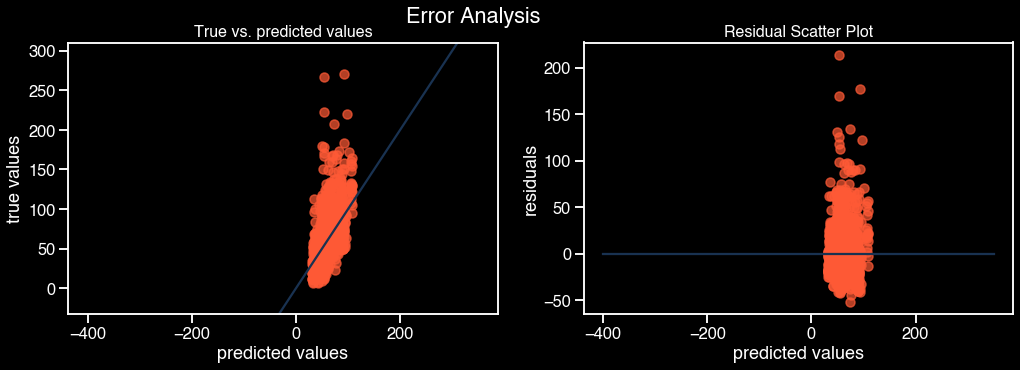

In [19]:
error_analysis(y_test, y_pred_test)